In [27]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# STEP 2: Load Dataset
# ===============================

df = pd.read_csv('/Users/jeevraj/Desktop/Python /Datasets/StudentPerformanceFactors.csv')

# View dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

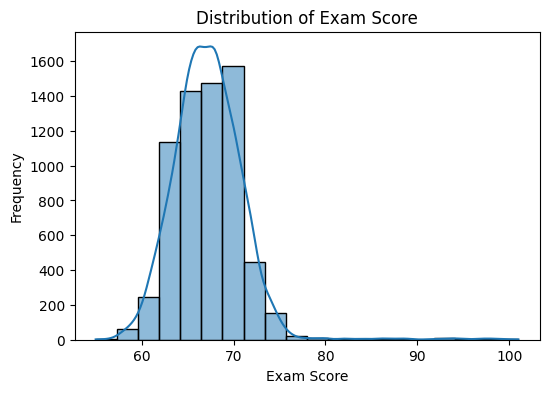

In [28]:
# ===============================
# STEP 3: Exploratory Data Analysis (EDA)
# ===============================

# 3.1 Target Variable Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], kde=True, bins=20)
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


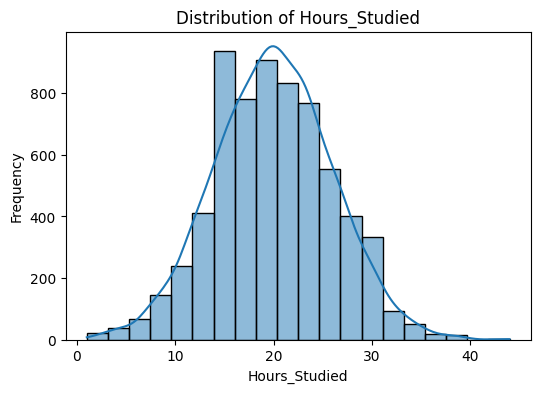

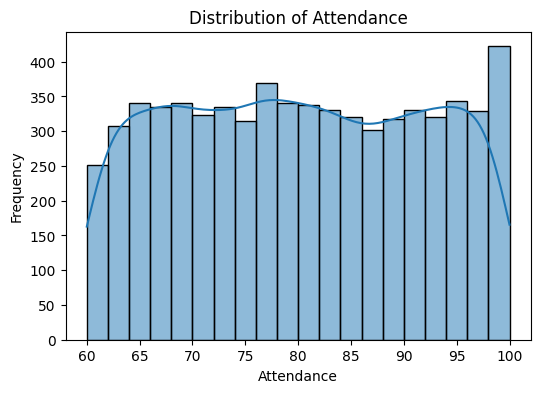

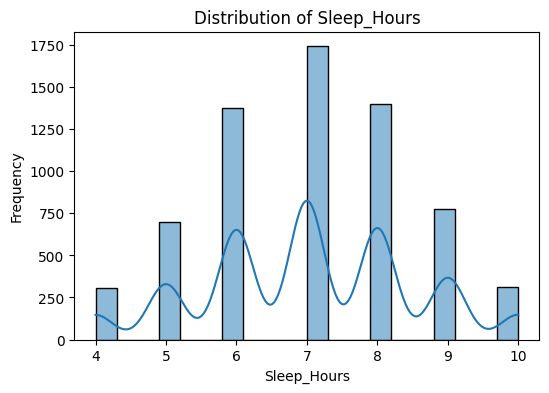

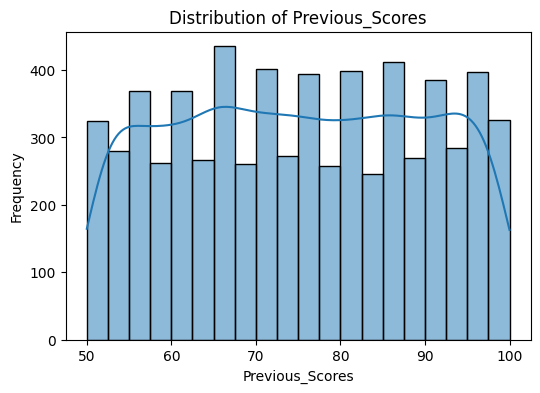

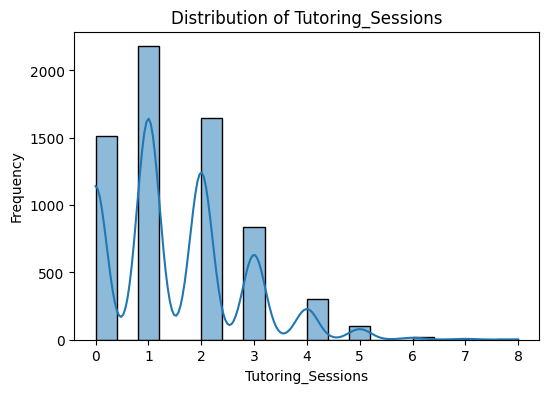

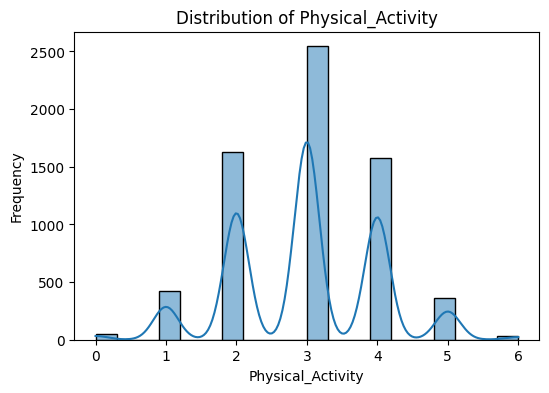

In [29]:
# 3.2 Numeric Feature Distributions
numeric_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions',
    'Physical_Activity'
]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


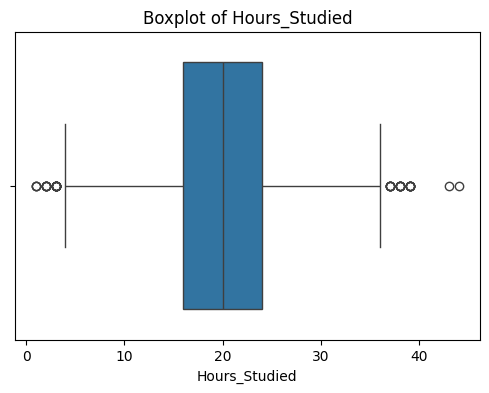

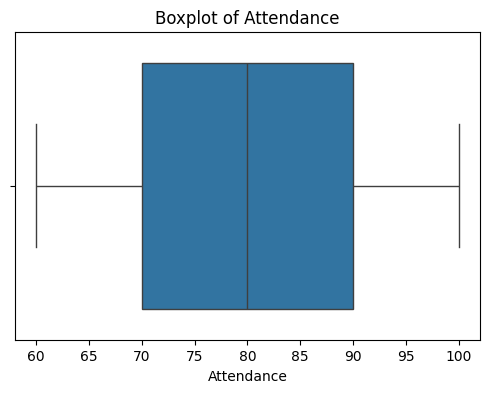

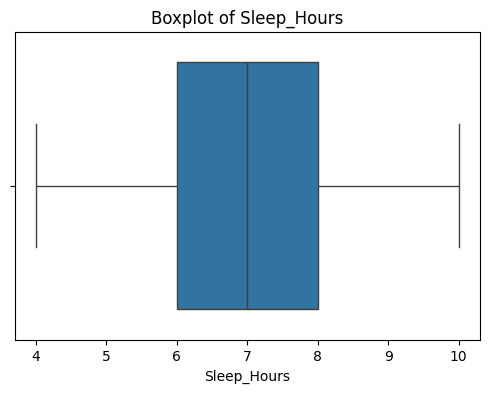

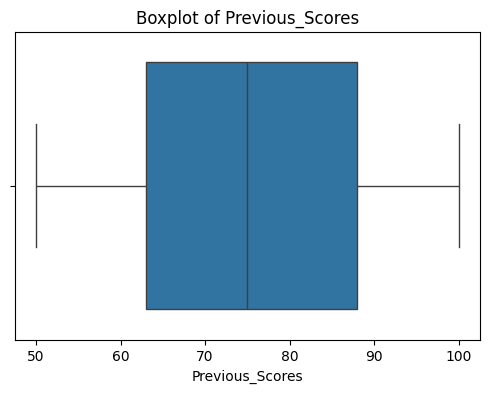

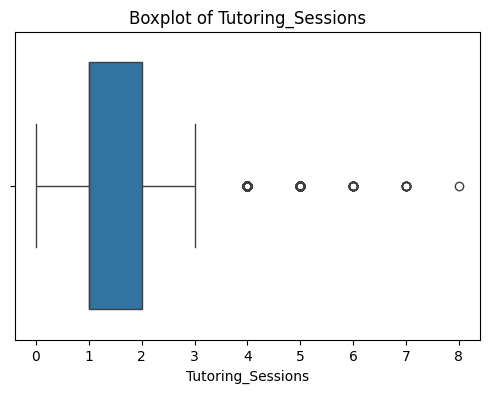

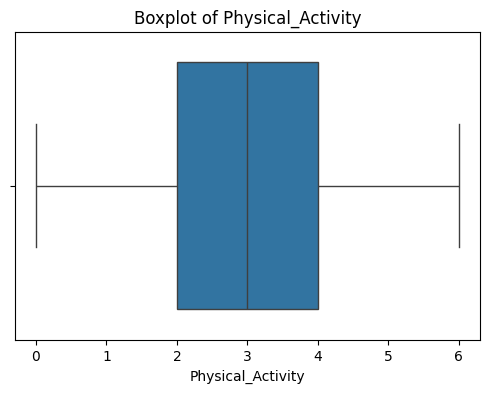

In [30]:
# 3.3 Boxplots to Detect Outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


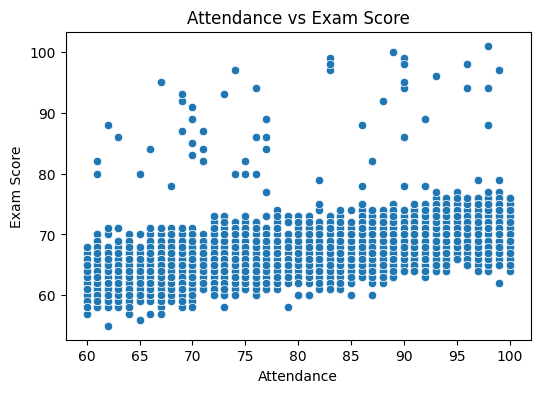

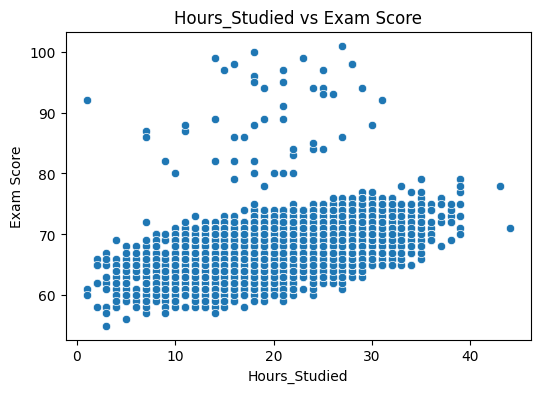

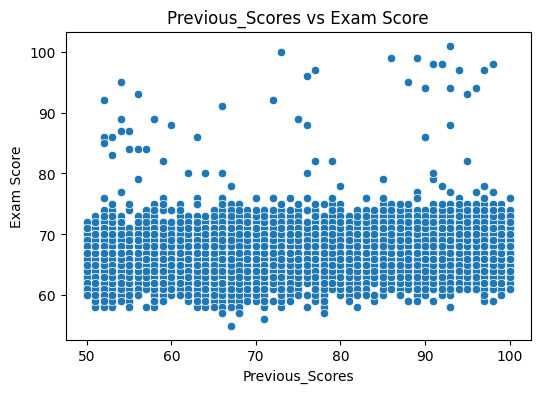

In [31]:
# 3.4 Relationship Between Important Features and Exam Score

important_features = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores'
]

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Exam_Score'])
    plt.title(f'{col} vs Exam Score')
    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.show()


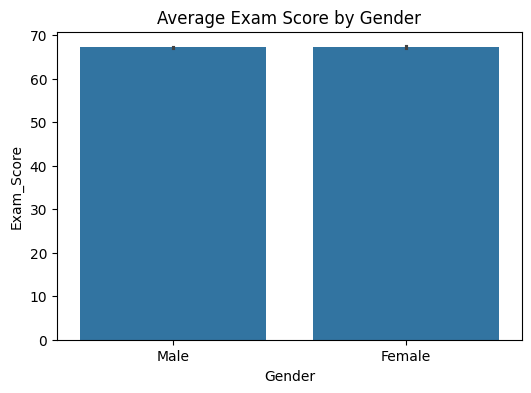

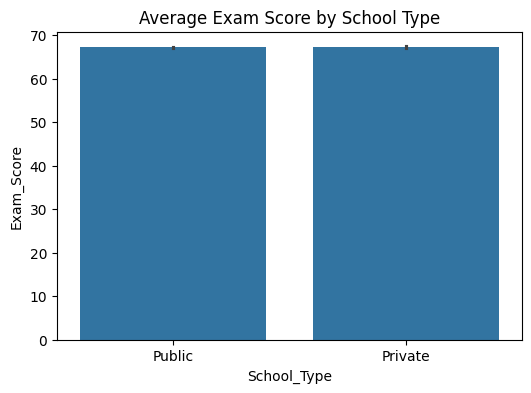

In [32]:
# 3.5 Exam Score vs Categorical Features (Bar Plots)

plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Exam_Score', data=df)
plt.title('Average Exam Score by Gender')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='School_Type', y='Exam_Score', data=df)
plt.title('Average Exam Score by School Type')
plt.show()


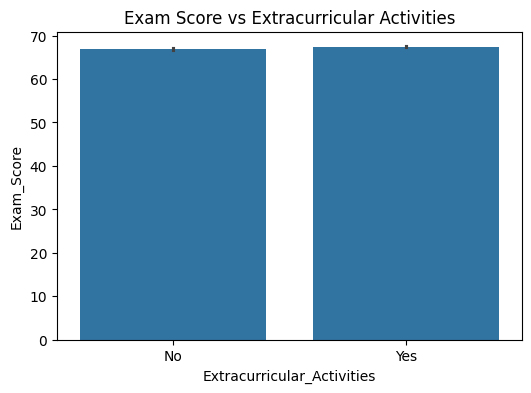

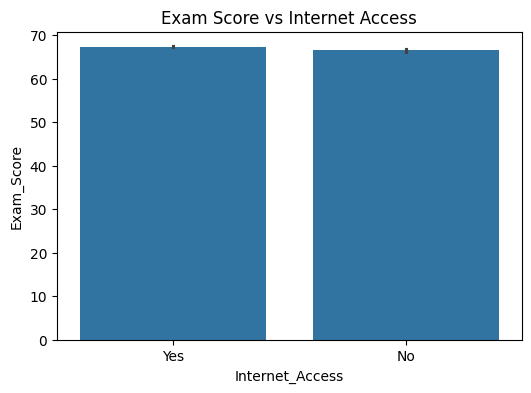

In [33]:
# 3.6 Impact of Study Habits

plt.figure(figsize=(6,4))
sns.barplot(x='Extracurricular_Activities', y='Exam_Score', data=df)
plt.title('Exam Score vs Extracurricular Activities')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Internet_Access', y='Exam_Score', data=df)
plt.title('Exam Score vs Internet Access')
plt.show()


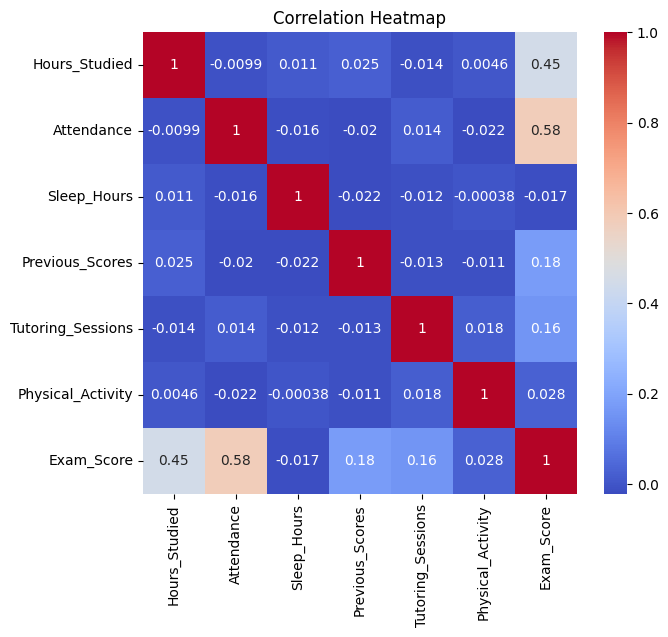

In [34]:
# 3.7 Correlation Heatmap (Numeric Variables)

plt.figure(figsize=(7,6))
sns.heatmap(
    df[numeric_cols + ['Exam_Score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# ===============================
# STEP 4: Data Cleaning
# ===============================

df_clean = df.copy()

# Remove duplicate rows
df_clean.drop_duplicates(inplace=True)

# Fix incorrect / missing categorical values
df_clean['Teacher_Quality'].replace(
    ["", " ", "nan", "NULL", "Midium"], np.nan, inplace=True
)
df_clean['Teacher_Quality'].fillna('Medium', inplace=True)

df_clean['Parental_Education_Level'].replace(
    ["", " ", "nan", "NULL"], np.nan, inplace=True
)
df_clean['Parental_Education_Level'].fillna('High School', inplace=True)

df_clean['Distance_from_Home'].replace(
    ["", " ", "nan", "NULL"], np.nan, inplace=True
)
df_clean['Distance_from_Home'].fillna('Near', inplace=True)

df_clean.isnull().sum()


/var/folders/j9/qkxfny2j0cvf5rvfst0wpw340000gn/T/ipykernel_3871/139407108.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Teacher_Quality'].replace(
/var/folders/j9/qkxfny2j0cvf5rvfst0wpw340000gn/T/ipykernel_3871/139407108.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [36]:
# ===============================
# STEP 5: Encoding Categorical Variables
# ===============================

# Binary encoding
df_clean['Extracurricular_Activities'] = df_clean['Extracurricular_Activities'].map({'Yes':1,'No':0})
df_clean['Internet_Access'] = df_clean['Internet_Access'].map({'Yes':1,'No':0})
df_clean['Learning_Disabilities'] = df_clean['Learning_Disabilities'].map({'Yes':1,'No':0})
df_clean['School_Type'] = df_clean['School_Type'].map({'Public':1,'Private':0})
df_clean['Gender'] = df_clean['Gender'].map({'Male':1,'Female':0})

# One-hot encoding
categorical_cols = [
    'Parental_Involvement', 'Access_to_Resources',
    'Motivation_Level', 'Family_Income',
    'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
]

df_clean = pd.get_dummies(df_clean, columns=categorical_cols)

df_clean = df_clean.astype(float)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   float64
 1   Attendance                             6607 non-null   float64
 2   Extracurricular_Activities             6607 non-null   float64
 3   Sleep_Hours                            6607 non-null   float64
 4   Previous_Scores                        6607 non-null   float64
 5   Internet_Access                        6607 non-null   float64
 6   Tutoring_Sessions                      6607 non-null   float64
 7   School_Type                            6607 non-null   float64
 8   Physical_Activity                      6607 non-null   float64
 9   Learning_Disabilities                  6607 non-null   float64
 10  Gender                                 6607 non-null   float64
 11  Exam

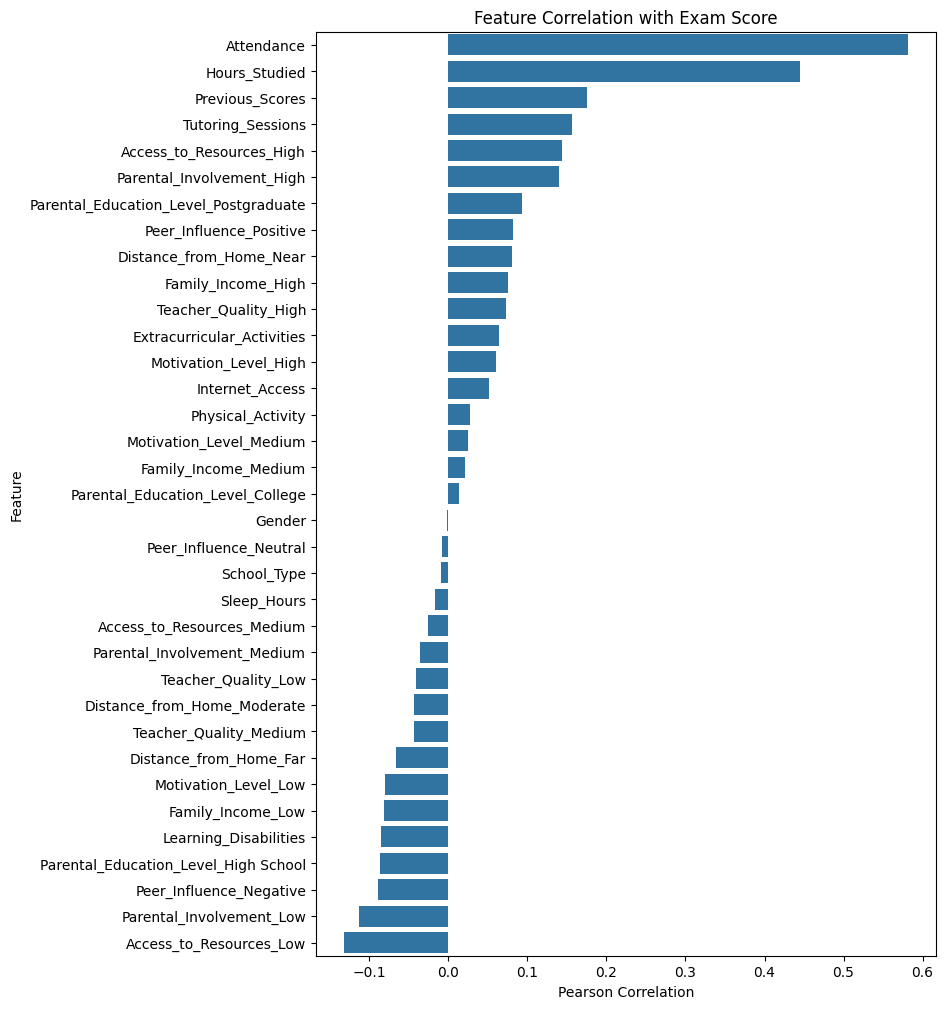

In [37]:
# ===============================
# STEP 6: Feature Correlation with Target
# ===============================

from scipy.stats import pearsonr

features = df_clean.drop('Exam_Score', axis=1).columns

correlations = {
    feature: pearsonr(df_clean[feature], df_clean['Exam_Score'])[0]
    for feature in features
}

correlation_df = pd.DataFrame(
    correlations.items(),
    columns=['Feature', 'Pearson Correlation']
).sort_values(by='Pearson Correlation', ascending=False)

# Visualization
plt.figure(figsize=(8,12))
sns.barplot(x='Pearson Correlation', y='Feature', data=correlation_df)
plt.title('Feature Correlation with Exam Score')
plt.show()


In [38]:
# ===============================
# STEP 7: Feature Selection
# ===============================

strong_features = ['Attendance', 'Hours_Studied']

moderate_features = [
    'Previous_Scores',
    'Tutoring_Sessions',
    'Access_to_Resources_High',
    'Parental_Involvement_High'
]

near_zero_features = ['Gender', 'School_Type', 'Sleep_Hours']

selected_features = strong_features + moderate_features + near_zero_features

X = df_clean[selected_features]
y = df_clean['Exam_Score']


In [39]:
# ===============================
# STEP 8: Feature Scaling
# ===============================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
# ===============================
# STEP 9: Train-Test Split
# ===============================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [41]:
# ===============================
# STEP 10: Train Linear Regression Model
# ===============================

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# ===============================
# STEP 11: Model Evaluation
# ===============================

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = lr.predict(X_test)

print("Selected Model R2:", r2_score(y_test, y_pred))
print("Selected Model MAE:", mean_absolute_error(y_test, y_pred))


Selected Model R2: 0.6829371108335687
Selected Model MAE: 1.075708969283785


In [43]:
# ===============================
# STEP 12: Full Feature Model Comparison
# ===============================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Use ALL features except target
X_full = df_clean.drop('Exam_Score', axis=1)

# IMPORTANT: Separate scaler for full-feature model
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Train-test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_full_scaled, y, test_size=0.2, random_state=42
)

# Train full model
lr_full = LinearRegression()
lr_full.fit(Xf_train, yf_train)

# Evaluation
print("Full Model R2:", r2_score(yf_test, lr_full.predict(Xf_test)))
print("Selected Model R2:", r2_score(y_test, y_pred))


Full Model R2: 0.7696495724907311
Selected Model R2: 0.6829371108335687


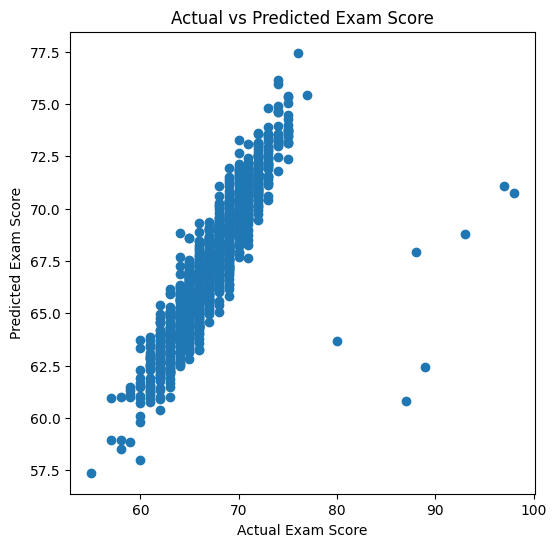

In [44]:
# ===============================
# STEP 13: Visualization (Actual vs Predicted)
# ===============================

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.show()


In [45]:
# ===============================
# STEP 14: Predict Exam Score for New Student
# ===============================

new_student = [[
    90,   # Attendance (%)
    6,    # Hours_Studied
    78,   # Previous_Scores
    2,    # Tutoring_Sessions
    1,    # Access_to_Resources_High
    1,    # Parental_Involvement_High
    1,    # Gender (Male=1, Female=0)
    1,    # School_Type (Public=1, Private=0)
    7     # Sleep_Hours
]]

# Use SAME scaler used during training
new_student_scaled = scaler.transform(new_student)

predicted_score = lr.predict(new_student_scaled)
print("Predicted Exam Score:", round(predicted_score[0], 2))


Predicted Exam Score: 67.38


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
import joblib

joblib.dump(lr, "linear_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
